# Implementation of SGD-based Learning for Factorization Machines

S. Rendle, "**Factorization Machines with libFM**," ACM Trans. Intell. Syst. Technol., 3(3), May 2012.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

from FM.SGD import Regression, Classification

### Utility functions

In [3]:
def plot(l, xlabel, ylabel):
    fig, ax = plt.subplots()
    ax.plot(range(len(l)), l)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    fig.set_size_inches((5.5,3))
    fig.patch.set_alpha(0.0)

## Regression: Mock dataset which is the same as Fig. 1

In [4]:
X = np.array([
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0.5, 0.5],
    [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0.5, 0, 0.5],
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0.5, 0.5, 0]
    ])
y = np.array([5, 3, 1, 4, 5, 1, 5])

n_sample = y.size

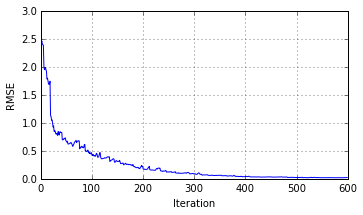

In [5]:
# learn incrementally
regressor = Regression(X, y)

RMSEs = []
for i in range(600):
    # update with randomly sampled one
    j = np.random.randint(n_sample)
    RMSE = regressor.update(X[j], y[j])
    RMSEs.append(RMSE)
    
plot(RMSEs, 'Iteration', 'RMSE')

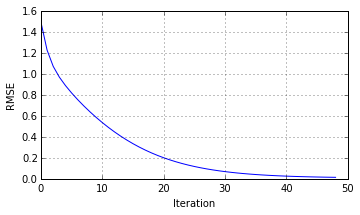

In [6]:
# learn at once
# 1 iteration = descent for all samples
regressor = Regression(X, y)
RMSEs = regressor.fit()
plot(RMSEs, 'Iteration', 'RMSE')

## Classification: Based on the mock dataset

In [7]:
# give labels for the mock dataset
y_labels = np.ones_like(y)
y_labels[y < np.mean(y)] = -1
y_labels

array([ 1, -1, -1,  1,  1, -1,  1])

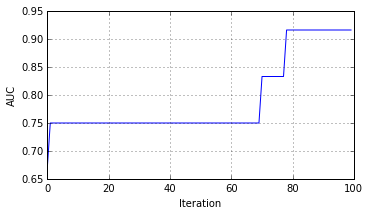

In [8]:
# learn incrementally
classifier = Classification(X, y_labels)

AUCs = []
for i in range(100):
    # update with random sample
    j = np.random.randint(n_sample)
    current = classifier.update(X[j], y_labels[j])
    AUCs.append(current)

plot(AUCs, 'Iteration', 'AUC')